In [1]:
"""
Erick Serrano
HW10
Choose a particular application and perform fft analysis,
and illustrate how fft helps
"""

import numpy as np
import matplotlib.pyplot as plt
from pydub import AudioSegment


# 1) Download file

Our proposed application will be to compress the audio file in the same folder to a smaller size (bensound-hey.mp3)

In [2]:
music = AudioSegment.from_mp3("bensound-hey.mp3")

In [3]:
print(type(music))
print(music)


<class 'pydub.audio_segment.AudioSegment'>


# 2) Convert the file 

We want to convert the file into an integer array to begin the FFT compression process

In [4]:
data = music.raw_data
frames = music.frame_rate
width = music.sample_width
channels = music.channels

print(type(data), len(data))
print(frames)
print(width)
print(channels)

<class 'bytes'> 30260772
44100
2
2


In [5]:
#Choose np.int16 based off of channels*width = 4bytes
new_song = np.frombuffer(data, dtype = np.int32)
#Avoid "read-only" issues
new_songg = new_song.reshape((new_song.shape[0], 1))

print(new_songg.shape)
print(new_songg.dtype)

(7565193, 1)
int32


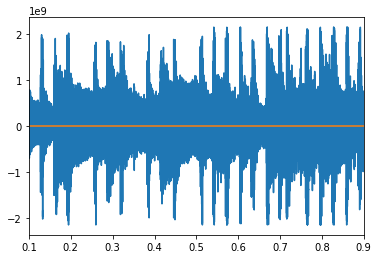

In [6]:
x = np.linspace(0, 20, len(new_songg))
plt.xlim([0.1,0.9])
plt.plot(x, new_songg)
plt.plot(x)

# 3) Perform FFT

(7565193, 1)
(6897730, 1)


/home/erick/miniconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


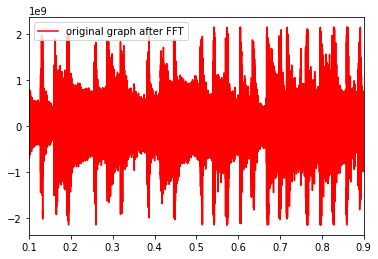

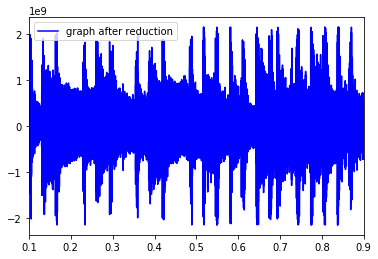

In [19]:
c = np.fft.fft(new_songg)
x = np.linspace(0,20, len(c))
y = np.fft.ifft(c).real

print(y.shape)
y = y.astype(np.int32)

#Played around with the number to achieve noticable results
c_2 = c[np.abs(c)>100000000/2]
c_2 = c_2.reshape(c_2.shape[0], 1)
x_2 = np.linspace(0, 20, len(c_2))
y_2 = np.fft.ifft(c_2).real

print(y_2.shape)
y_2 = y_2.astype(np.int32)


plt.plot(x, y, 'r', label = 'original graph after FFT')
plt.xlim([0.1, 0.9])
plt.legend()
plt.show()

plt.plot(x_2, y_2, 'b', label = 'graph after reduction')
plt.xlim([0.1,0.9])
plt.legend()
plt.show()


# 4) Observe Results

After applying FFT, we observe the results of each package. $y_{songg}$ is the original data, $y_{ifft}$ uses fft, and $y_{ifft2}$ removes data to compress the data. 

In [20]:
#y.tobytes()
y_songg = AudioSegment(new_songg.tobytes(), frame_rate= frames, sample_width = width, channels = channels)
y_ifft = AudioSegment(y.tobytes(), frame_rate= frames, sample_width = width, channels = channels)
y_ifft2 = AudioSegment(y_2.tobytes(), frame_rate= frames, sample_width = width, channels = channels)


print(len(y_songg))
print(len(y_ifft))
print(len(y_ifft2))

y_songg.export("original.mp3", format="mp3")
print('First song complete')
y_ifft.export("fft.mp3", format = "mp3")
print('Second song complete')
y_ifft2.export("fft_reduced.mp3", format = "mp3")
print('Third Song complete')

171546
171546
156411
First song complete
Second song complete
Third Song complete


# 5) Conclusion

We reduced the size of the original media file using FFT. The file was reduced from a size of 3.43 MB to 2.5 MB. Thus, we were able to use FFT effectively to compress an audio file 